# 🔧 1. Imports and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src")
from data_loader import load_data

# 📥 2. Load the Dataset

In [3]:
# Load data
df=load_data("../data/raw/MachineLearningRating_v3.csv")

# Quick look
df.shape

df.head()

/home/ablex/Development/AI/insurance-risk-analytics/notebooks/../src/data_loader.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,delimiter="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# 🔍 3. Data Structure & Summary

In [4]:
# Summary of data types and missing values
df.info()

# Descriptive statistics for numeric columns
df.describe()

# Column names
df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

['UnderwrittenCoverID',
 'PolicyID',
 'TransactionMonth',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'CustomValueEstimate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'WrittenOff',
 'Rebuilt',
 'Converted',
 'CrossBorder',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims']

# 4. Data Quality Checks

In [5]:

# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percent of Total': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percent of Total', ascending=False)
missing_df


,Missing Count,Percent of Total
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


# 📊 5. Univariate Analysis

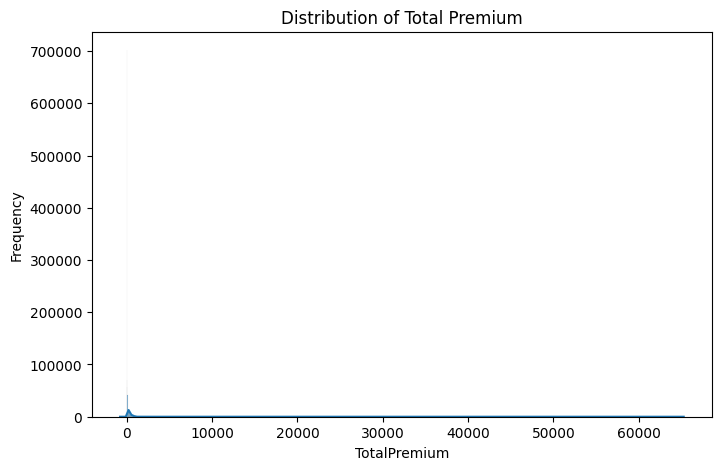

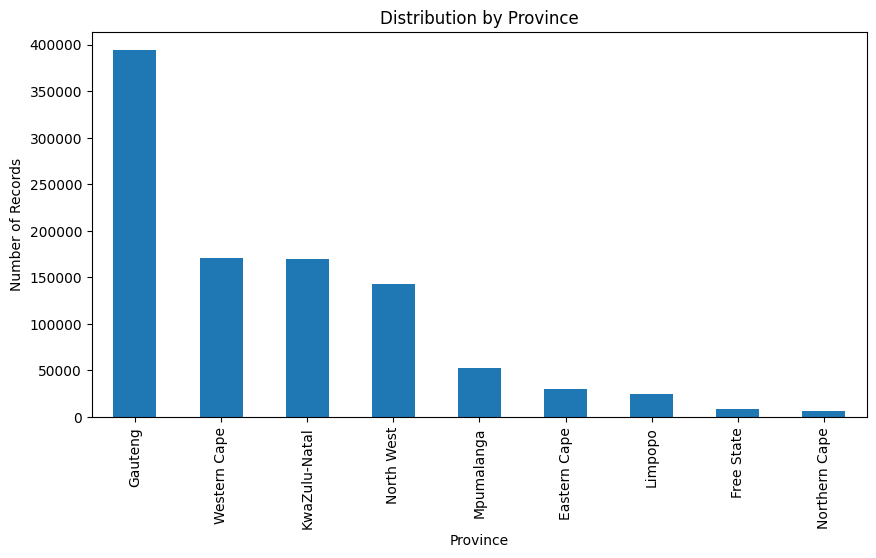

In [6]:

# Histogram of Total Premium
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalPremium'], kde=True)
plt.title('Distribution of Total Premium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

# Bar chart of categorical variable - Province
plt.figure(figsize=(10, 5))
df['Province'].value_counts().plot(kind='bar')
plt.title('Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Number of Records')
plt.show()

# 🔗 6. Bivariate Analysis

/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


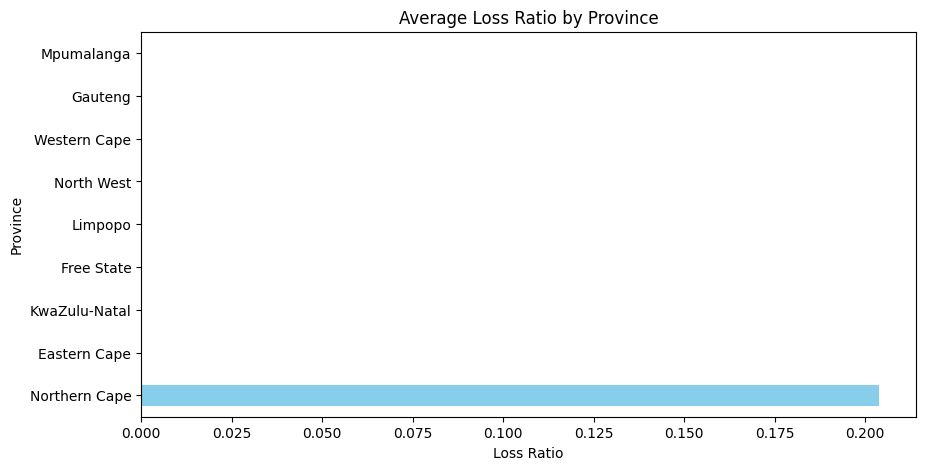

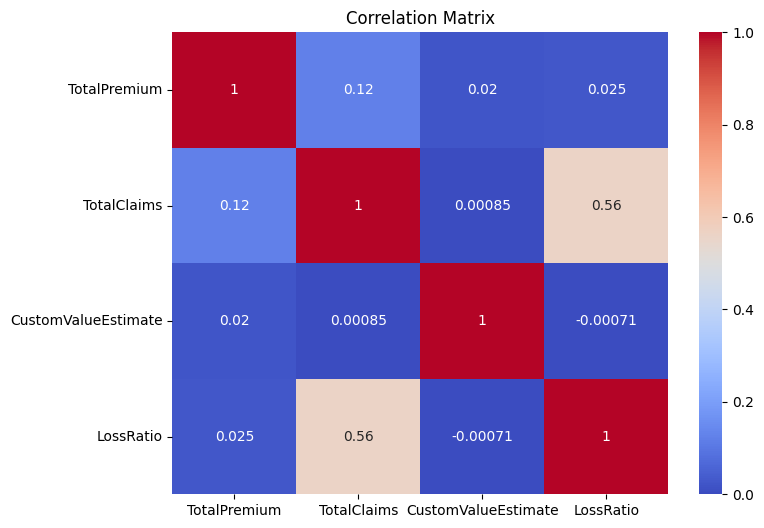

In [7]:

# Create Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Province
loss_by_province = df.groupby('Province')['LossRatio'].mean().sort_values()
plt.figure(figsize=(10, 5))
loss_by_province.plot(kind='barh', color='skyblue')
plt.title('Average Loss Ratio by Province')
plt.xlabel('Loss Ratio')
plt.ylabel('Province')
plt.show()

# Correlation Matrix
corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ⏳ 7. Temporal Trend Analysis

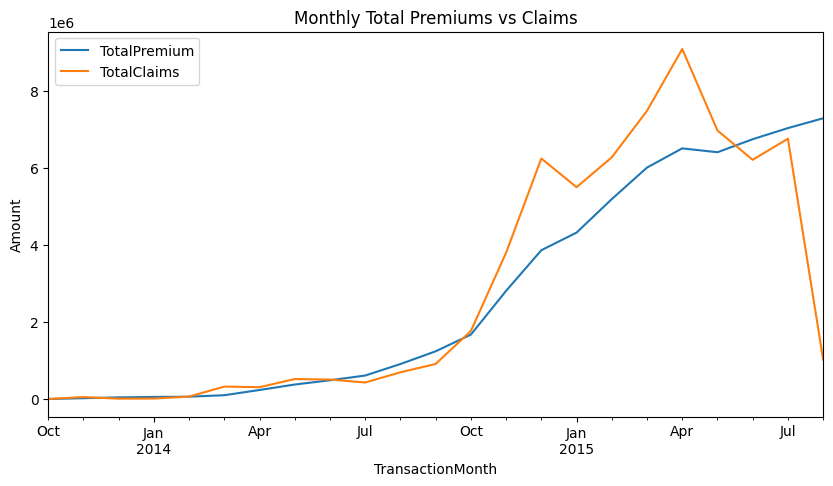

In [8]:

# Convert TransactionMonth to datetime
try:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
except:
    print("TransactionMonth format needs manual parsing.")

monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
})

monthly.plot(figsize=(10, 5), title='Monthly Total Premiums vs Claims')
plt.ylabel('Amount')
plt.show()

## 8. Vehicle Make & Claim Risk

/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


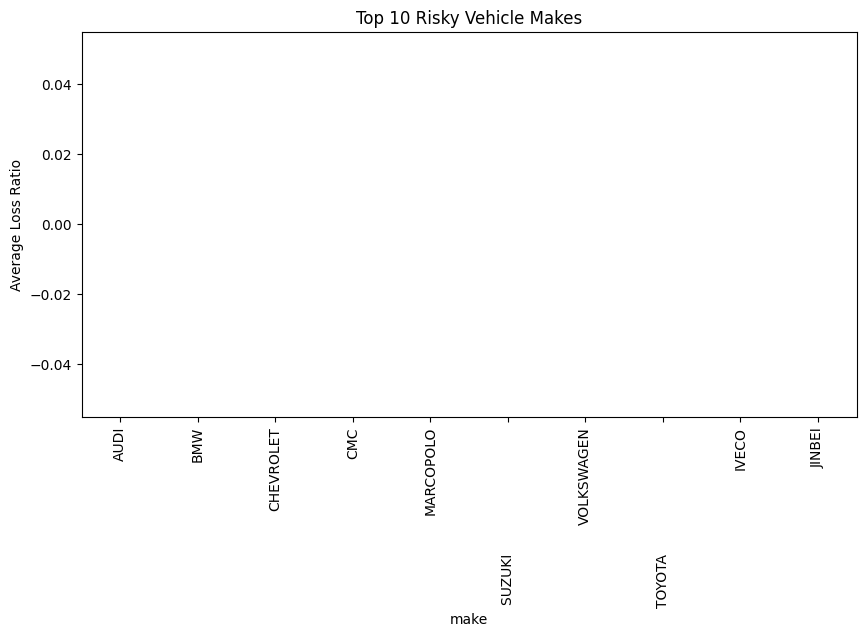

In [9]:
# Top 10 risky makes
risky_makes = df.groupby('make')['LossRatio'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
risky_makes.plot(kind='bar', color='red')
plt.title('Top 10 Risky Vehicle Makes')
plt.ylabel('Average Loss Ratio')
plt.show()


## 9. Outlier Detection

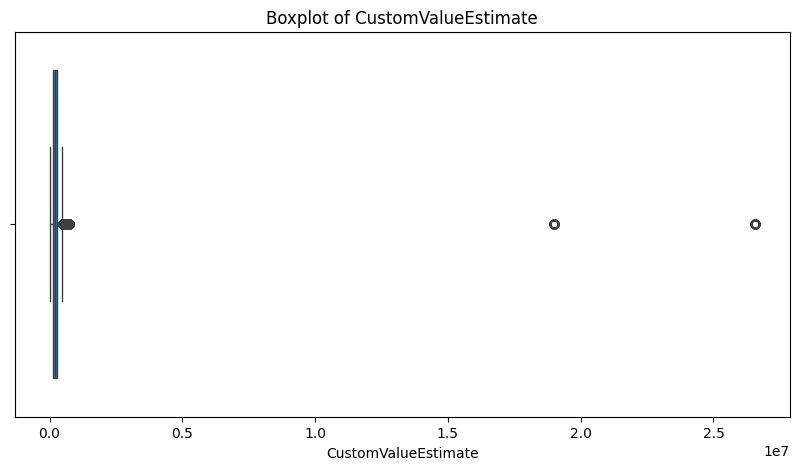

In [10]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Boxplot of CustomValueEstimate')
plt.show()

## Loss Ratio by Province and Gender

/tmp/ipykernel_10234/3414260084.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


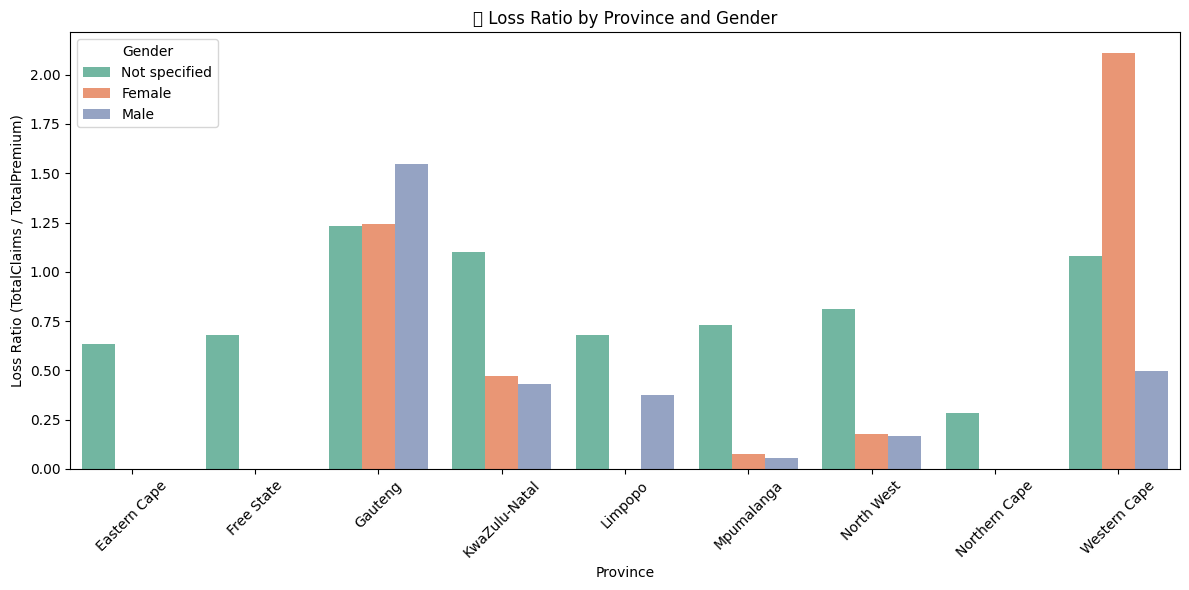

In [11]:
loss_ratio_df = df.groupby(['Province', 'Gender']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()
loss_ratio_df['LossRatio'] = loss_ratio_df['TotalClaims'] / loss_ratio_df['TotalPremium']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=loss_ratio_df,
    x='Province',
    y='LossRatio',
    hue='Gender',
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title("📊 Loss Ratio by Province and Gender")
plt.ylabel("Loss Ratio (TotalClaims / TotalPremium)")
plt.tight_layout()
plt.show()


## Loss Ratio Heatmap by Province and Vehicle Type

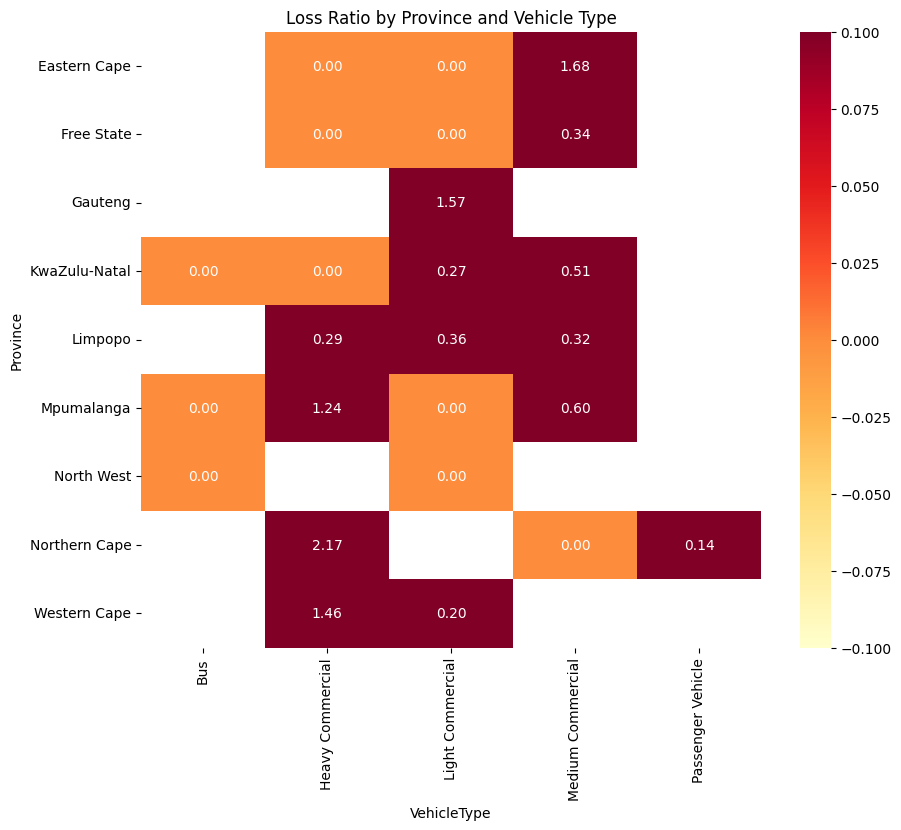

In [14]:
pivot_table = df.pivot_table(values='LossRatio', index='Province', columns='VehicleType', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Loss Ratio by Province and Vehicle Type')
#plt.savefig('../reports/figures/loss_ratio_heatmap.png')
plt.show()

## CustomValueEstimate vs TotalClaims (with Outlier Filtering)

/tmp/ipykernel_10234/3778720472.py:16: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


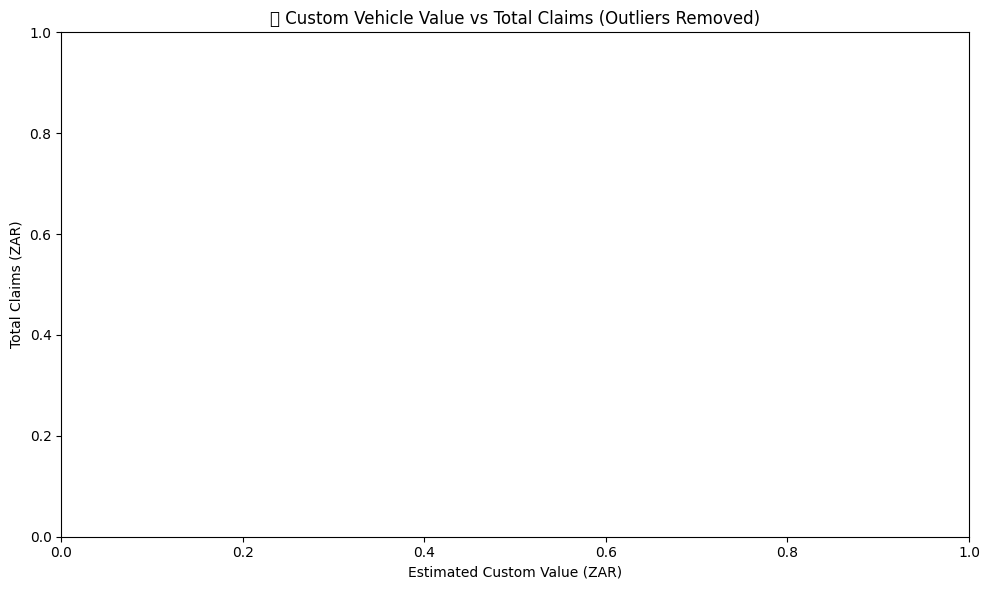

In [12]:
# Filter out extreme outliers to improve visualization
filtered_df = df[(df['CustomValueEstimate'] < df['CustomValueEstimate'].quantile(0.99)) &
                 (df['TotalClaims'] < df['TotalClaims'].quantile(0.99))]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='CustomValueEstimate',
    y='TotalClaims',
    hue='VehicleType',
    alpha=0.6
)
plt.title("🚘 Custom Vehicle Value vs Total Claims (Outliers Removed)")
plt.xlabel("Estimated Custom Value (ZAR)")
plt.ylabel("Total Claims (ZAR)")
plt.tight_layout()
plt.show()


## Loss Ratio by Car Make and Body Type

/tmp/ipykernel_10234/1039064479.py:22: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


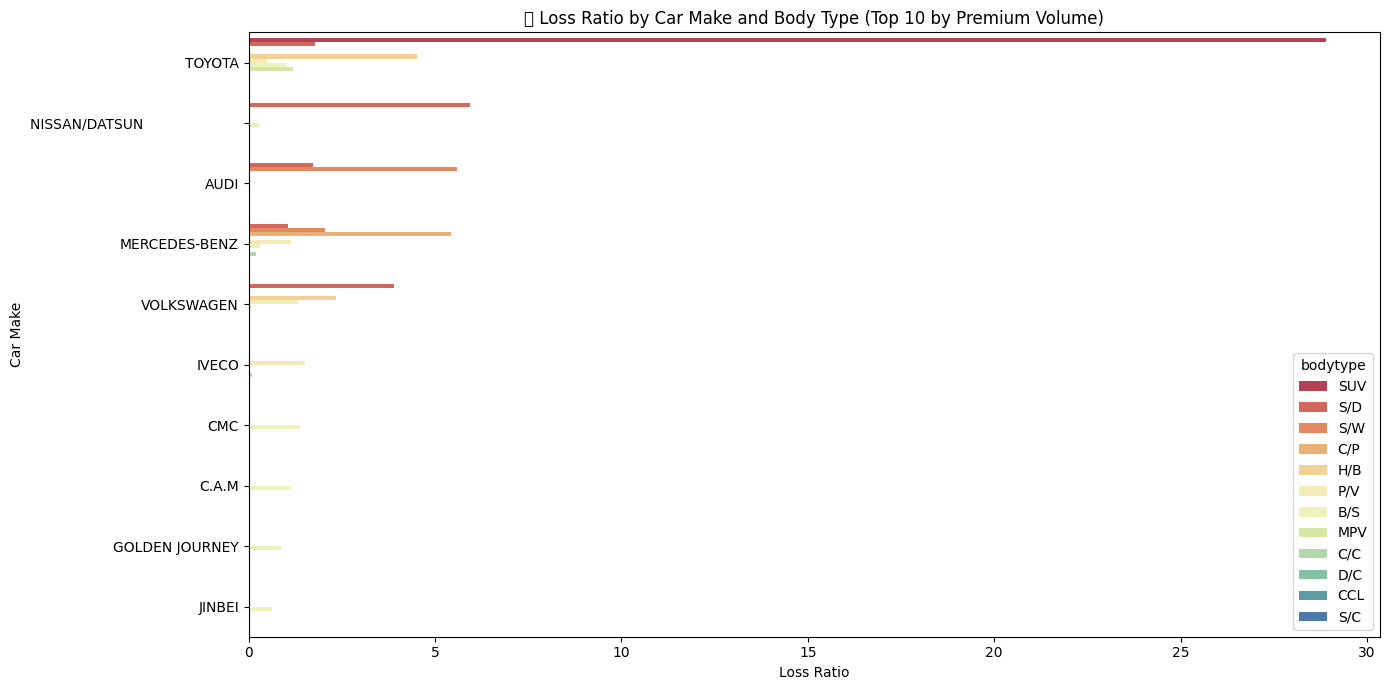

In [13]:
# Group by Make and BodyType, calculate Loss Ratio
make_body_loss = df.groupby(['make', 'bodytype']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

make_body_loss['LossRatio'] = make_body_loss['TotalClaims'] / make_body_loss['TotalPremium']
top_makes = make_body_loss.groupby('make')['TotalPremium'].sum().nlargest(10).index
filtered_loss = make_body_loss[make_body_loss['make'].isin(top_makes)]

plt.figure(figsize=(14, 7))
sns.barplot(
    data=filtered_loss.sort_values("LossRatio", ascending=False),
    x='LossRatio',
    y='make',
    hue='bodytype',
    palette='Spectral'
)
plt.title("🚗 Loss Ratio by Car Make and Body Type (Top 10 by Premium Volume)")
plt.xlabel("Loss Ratio")
plt.ylabel("Car Make")
plt.tight_layout()
plt.show()
